In [21]:
from surprise import SVD, Dataset, accuracy
from surprise.model_selection import train_test_split, cross_validate, KFold
from sklearn.pipeline import Pipeline
import time
import numpy as np

## Data Import

In [ ]:
data_raw = Dataset.load_builtin('ml-100k')

In [7]:
from surprise import Reader
from pathlib import Path

path = Path(Path.cwd().parents[0], 'data', 'movielens', 'ml-latest-small')
reader = Reader(line_format = 'user item rating timestamp', sep=',', skip_lines=1)
rating_data = Dataset.load_from_file(Path(path, 'ratings.csv'), reader)
rating_data

In [10]:
train, test = train_test_split(rating_data, test_size=.2)

In [53]:
mean_rmse = list()
mean_mae = list()
exec_times = list()

## Pipeline 1

In [8]:
alg = SVD()

In [11]:
alg.fit(train)

In [71]:
preds = alg.test(test)

In [54]:
start = time.time()
cval_res = cross_validate(alg, rating_data, measures=['RMSE', 'MAE'], cv=KFold(5, random_state=0), verbose=True)
exec_time = time.time() - start
exec_times.append(exec_time)
mean_rmse.append(np.mean(cval_res['test_rmse']))
mean_mae.append(np.mean(cval_res['test_mae']))

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8815  0.8777  0.8681  0.8733  0.8696  0.8740  0.0050  
MAE (testset)     0.6761  0.6742  0.6692  0.6683  0.6678  0.6711  0.0034  
Fit time          9.19    9.26    9.44    9.23    9.20    9.26    0.09    
Test time         0.30    0.46    0.29    0.30    0.45    0.36    0.08    


## Pipeline 2

In [55]:
from surprise.prediction_algorithms.knns import KNNBasic

opts = {'name': 'cosine', 'user_based':True}
user_model = KNNBasic(sim_options=opts)

In [58]:
user_model.fit(train)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [60]:
preds1 = user_model.test(test)

display(accuracy.rmse(preds1))
display(accuracy.mae(preds1))

RMSE: 1.0033


1.003272615449386

MAE:  0.7948


0.7947790716816

In [56]:
start = time.time()
cval_res = cross_validate(user_model, rating_data, measures=['RMSE', 'MAE'], cv=KFold(5, random_state=0), verbose=False)
exec_time = time.time() - start
exec_times.append(exec_time)
mean_rmse.append(np.mean(cval_res['test_rmse']))
mean_mae.append(np.mean(cval_res['test_mae']))

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [57]:
opts = {'name': 'cosine', 'user_based': False} #other similarity options: pearson, pearson_baseline
item_model = KNNBasic(sim_options=opts)

In [62]:
item_model.fit(train)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [63]:
preds2 = item_model.test(test)

display(accuracy.rmse(preds))
display(accuracy.mae(preds))

RMSE: 1.0033


1.003272615449386

MAE:  0.7948


0.7947790716816

In [58]:
start = time.time()
cval_res = cross_validate(item_model, rating_data, measures=['RMSE', 'MAE'], cv=KFold(5, random_state=0), verbose=False)
exec_time = time.time() - start
exec_times.append(exec_time)
mean_rmse.append(np.mean(cval_res['test_rmse']))
mean_mae.append(np.mean(cval_res['test_mae']))

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [59]:
import pandas as pd

baseline_df = pd.DataFrame({'mae': mean_mae, 'rmse': mean_rmse, 'exec_time': exec_times, 
                            'model': ['svm', 'user_based_collaborative_filtering', 'item_based_collaborative_filtering']})

## Benchmarking

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='exec_time', ylabel='model'>

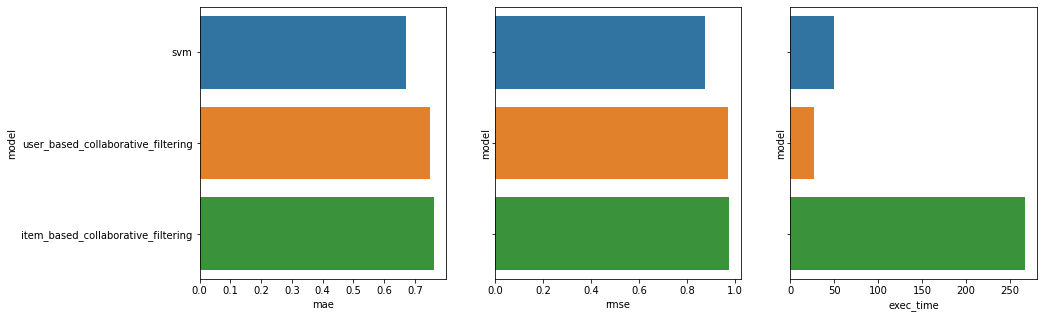

In [65]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.barplot(data=baseline_df, y='model', x='mae', ax=axs[0])
sns.barplot(data=baseline_df, y='model', x='rmse', ax=axs[1])
sns.barplot(data=baseline_df, y='model', x='exec_time', ax=axs[2])
# dir(fig)